In [1]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# read all the files from the folders
def load_data_from_folder(folder_path):
    all_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]
    df_list = [pd.read_csv(file) for file in all_files]
    return pd.concat(df_list, ignore_index=True)

# Load training and testing data
train_folder = 'final/train_db4'  
test_folder = 'final/test_db4'    
train_data = load_data_from_folder(train_folder)
test_data = load_data_from_folder(test_folder)

# Define input and output features
X_train = train_data[['vinp', 'pd', 'xpd', 'vdd', 'process', 'voltage', 'temperature']]
y_train = train_data['vinn']
print('xtrain', X_train.shape)

X_test = test_data[['vinp', 'pd', 'xpd', 'vdd', 'process', 'voltage', 'temperature']]
y_test = test_data['vinn']

# train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

joblib.dump(rf_model, 'random_forest_model.pkl')

print("Model training complete and saved as 'random_forest_model.pkl'")


# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


xtrain (2100000, 7)
Random Forest Regression Metrics:
Mean Squared Error (MSE): 0.02071352986585391
Mean Absolute Error (MAE): 0.06993479308027009
R-squared (R2): 0.9549722381515161


In [6]:
import joblib

# readfiles from the folder
def load_data_from_folder(folder_path):
    all_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]
    df_list = [pd.read_csv(file) for file in all_files]
    return pd.concat(df_list, ignore_index=True)

# training data
train_folder = 'final/train_db4' 
train_data = load_data_from_folder(train_folder)

# Define input and target
X_train = train_data[['vinp', 'pd', 'xpd', 'vdd', 'process', 'voltage', 'temperature']]
y_train = train_data['vinn']

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=10000, random_state=42)
rf_model.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(rf_model, 'random_forest_model.pkl')

print("Model training complete and saved as 'random_forest_model.pkl'")


Model training complete and saved as 'random_forest_model.pkl'


In [4]:
import pandas as pd
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the saved Random Forest model
rf_model = joblib.load('random_forest_model.pkl')

test_file = 'E:/mtec_project/final/test_db4/fastnslowp_3.6V_45_db4.csv'  
test_data = pd.read_csv(test_file)

# input and output features
X_test = test_data[['vinp', 'pd', 'xpd', 'vdd', 'process', 'voltage', 'temperature']]
y_test = test_data['vinn']  

y_pred = rf_model.predict(X_test)


output_df = test_data.copy()  
output_df['Predicted_vinn'] = y_pred  

# Saving
output_df.to_csv('predicted_output.csv', index=False)

print("Predictions saved to 'predicted_output.csv'.")


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Predictions saved to 'predicted_output.csv'.
Test Evaluation Metrics:
Mean Squared Error (MSE): 0.03670440023977793
Mean Absolute Error (MAE): 0.10045236321279086
R-squared (R2): 0.9224726886928009


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

predicted_data = pd.read_csv('predicted_output.csv')

plt.figure(figsize=(10, 6))
plt.plot(predicted_data['vinp'], linestyle='-', color='r', label='vinp')
plt.xlabel('Index')
plt.ylabel('vinp')
plt.title('vinp Plot')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(predicted_data['Predicted_vinn'], linestyle='-', color='b', label='Predicted vinn')
plt.xlabel('Index')
plt.ylabel('Predicted vinn')
plt.title('Predicted vinn Plot')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(predicted_data['vinp'], linestyle='-', color='r', label='vinp')
plt.plot(predicted_data['Predicted_vinn'], linestyle='-', color='b', label='Predicted vinn')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('vinp vs Predicted vinn')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from joblib import dump
import matplotlib.pyplot as plt

# Load data from a folder
def load_data_from_folder(folder_path):
    all_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]
    df_list = [pd.read_csv(file) for file in all_files]
    return pd.concat(df_list, ignore_index=True)

# Load training and testing data
train_folder = 'final/train_db4'
test_folder = 'final/test_db4'
train_data = load_data_from_folder(train_folder)
test_data = load_data_from_folder(test_folder)

# Define input and output features
X_train = train_data[['vinp', 'pd', 'xpd', 'vdd', 'process', 'voltage', 'temperature']]
y_train = train_data['vinn']
X_test = test_data[['vinp', 'pd', 'xpd', 'vdd', 'process', 'voltage', 'temperature']]
y_test = test_data['vinn']

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

# Experiment with different n_estimators
n_estimators_list = [10, 50, 100, 200]
mse_list = []
mae_list = []
r2_list = []

for n in n_estimators_list:
    # Train the Random Forest model
    rf_model = RandomForestRegressor(n_estimators=n, random_state=42, n_jobs=-1)  # `n_jobs=-1` for parallelism (utilizes CPU cores)
    rf_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf_model.predict(X_test)
    
    # Compute metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store metrics
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)
    
    print(f"Model with n_estimators={n}: MSE={mse}, MAE={mae}, R2={r2}")
    
    # Save the model for each n_estimators value
    dump(rf_model, f'random_forest_model_{n}_estimators.pkl')
    print(f"Model saved as 'random_forest_model_{n}_estimators.pkl'")

# Plot the metrics
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, mse_list, label='MSE', marker='o', color='blue')
plt.plot(n_estimators_list, mae_list, label='MAE', marker='o', color='green')
plt.plot(n_estimators_list, r2_list, label='R2', marker='o', color='red')
plt.title('Model Performance with Different n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
import pandas as pd
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load the saved Random Forest model
rf_model = joblib.load('random_forest_model.pkl')

test_file = 'E:/mtec_project/final/test_db4/typical_3.6V_45_db4.csv'  
# test_file = 'E:/mtec_project/final/test_db4/fastnfastp_3.3V_45_db4.csv'  

test_data = pd.read_csv(test_file)

# Input and output features
X_test = test_data[['vinp', 'pd', 'xpd', 'vdd', 'process', 'voltage', 'temperature']]
y_test = test_data['vinn']  

# Predictions
y_pred = rf_model.predict(X_test)

# Save the predictions
output_df = test_data.copy()  
output_df['Predicted_vinn'] = y_pred  
output_df.to_csv('predicted_output_rf.csv', index=False)
print("Predictions saved to 'predicted_output.csv'.")

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# SNR Calculation
signal_power = np.mean(y_test ** 2)
noise_power = np.mean((y_test - y_pred) ** 2)
snr = 10 * np.log10(signal_power / noise_power)


# Print evaluation metrics
print(f"Test Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Signal-to-Noise Ratio (SNR): {snr:.2f} dB")


Predictions saved to 'predicted_output.csv'.
Test Evaluation Metrics:
Mean Squared Error (MSE): 0.01293190942005469
Mean Absolute Error (MAE): 0.057778769373041855
R-squared (R2): 0.9714581841476153
Signal-to-Noise Ratio (SNR): 21.29 dB


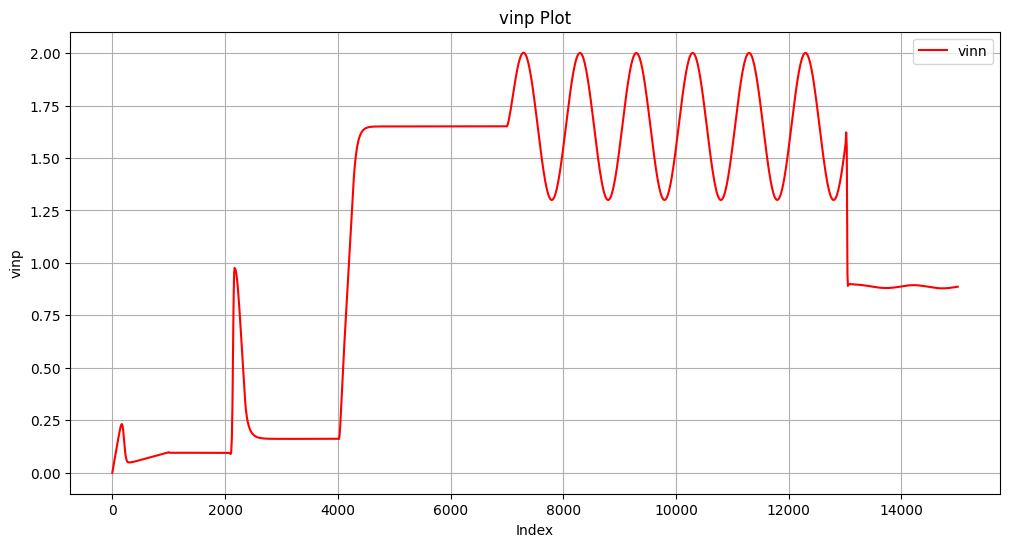

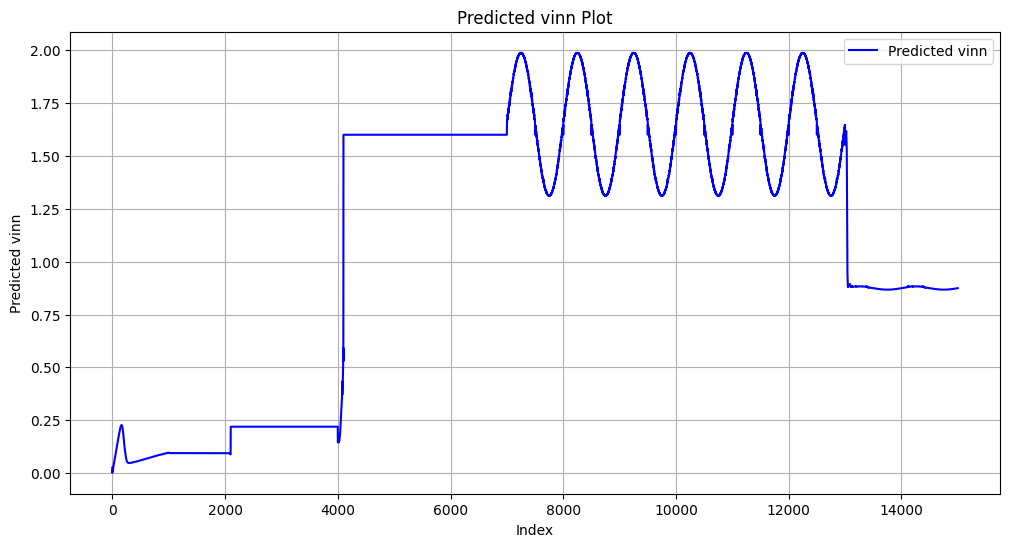

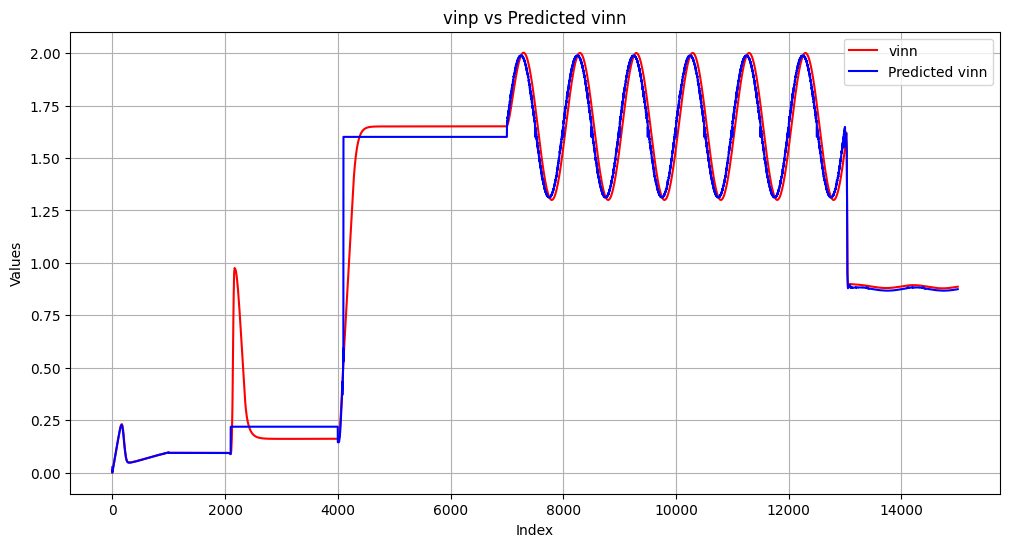

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

predicted_data = pd.read_csv('predicted_output_rf.csv')

plt.figure(figsize=(12, 6))
plt.plot(predicted_data['vinn'], linestyle='-', color='r', label='vinn')
plt.xlabel('Index')
plt.ylabel('vinp')
plt.title('vinp Plot')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(predicted_data['Predicted_vinn'], linestyle='-', color='b', label='Predicted vinn')
plt.xlabel('Index')
plt.ylabel('Predicted vinn')
plt.title('Predicted vinn Plot')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(predicted_data['vinn'], linestyle='-', color='r', label='vinn')
plt.plot(predicted_data['Predicted_vinn'], linestyle='-', color='b', label='Predicted vinn')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('vinp vs Predicted vinn')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
import pywt
import pandas as pd


file_path = 'E:/mtec_project/predicted_output.csv'
df = pd.read_csv(file_path)


transformed_columns = ['vinn_diff', 'vinn_actual']  


def inverse_wavelet_transform(df, columns, wavelet='db4', level=12):
    reconstructed_df = df.copy()
    for col in columns:

        coeffs = pywt.wavedec(df[col], wavelet, level=level)
        reconstructed_signal = pywt.waverec(coeffs, wavelet)

        reconstructed_df[col] = reconstructed_signal[:len(df[col])]
    return reconstructed_df

reconstructed_df = inverse_wavelet_transform(df, transformed_columns)

output_file_path = 'reconstructed_file.csv'
reconstructed_df.to_csv(output_file_path, index=False)

print(f"Reconstructed data saved to: {output_file_path}")


c:\Users\admin\miniforge3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 12 is too high: all coefficients will experience boundary effects.
  warnings.warn(


Reconstructed data saved to: reconstructed_file.csv


In [ ]:

import matplotlib.pyplot as plt

file_path = 'E:/mtec_project/reconstructed_file.csv'  
data = pd.read_csv(file_path)



signal1 = data['vinn_actual']  
signal2 = data['vinn_diff']  


time = pd.Series(range(len(signal1)))


plt.figure(figsize=(12, 6))


plt.subplot(3, 1, 1)
plt.plot(time, signal1, label='Signal 1', color='blue')
plt.title('vinn_actual')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()


plt.subplot(3, 1, 2)
plt.plot(time, signal2, label='Signal 2', color='orange')
plt.title('vinn_diff')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()


plt.subplot(3, 1, 3)
plt.plot(time, signal1, label='Signal 1', color='blue')
plt.plot(time, signal2, label='Signal 2', color='orange', alpha=0.7)
plt.title('Both Signals Together')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()


plt.tight_layout()
plt.show()


In [12]:
import numpy as np

mae = np.mean(np.abs(signal1 - signal2))
print(f'Mean Absolute Error (MAE): {mae}')

mse = np.mean((signal1 - signal2) ** 2)
print(f'Mean Squared Error (MSE): {mse}')

signal_power = np.mean(signal1 ** 2)
noise_power = np.mean((signal1 - signal2) ** 2)
snr = 10 * np.log10(signal_power / noise_power)
print(f'Signal-to-Noise Ratio (SNR): {snr} dB')

Mean Absolute Error (MAE): 2.0000066000935088e-06
Mean Squared Error (MSE): 6.000000000065299e-08
Signal-to-Noise Ratio (SNR): 74.73050463794459 dB
